In [1]:
from os.path import exists
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt

## Question 0

### Data Files

Here is the [link](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv) to the 2009 RECS microdata file and here is the [link](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv) to the replicate weights in the 2009 data year. 

Here is the [link](https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv) to the 2015 RECS microdata file.

### Variables

I will use `HDD65` which reprensents heating degree days in 2009 base temperature 65F and `CDD65` which reprensents cooling degree days in 2009 base temperature 65F.

Also, I will use `DOEID` which reprensents unique identifier for each respondent.

In addition, I will use `REGIONC`, `NWEIGHT`.

### Weights and Replicate Weights

Here is the [link](https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf) that explains how to use the replicate weights.

To estimate standard errors for weighted point estimates, we first calculate the  estimator's variance as follow
$$ \hat{V}(\theta)=\frac{1}{R(1-\varepsilon)^{2}} \sum_{r=1}^{R}(\hat{\theta}_{r}-\hat{\theta})^{2},$$
where $R$ is the number of replicate subsamples, $\varepsilon=0.5$, $\hat{\theta}$ is the full sample based estimator and $\hat{\theta}_{r}$ is estimated from the r-th replicate subsample by using replicate weights. Then
the standard error of an estimator is
$$SE = \sqrt{\hat{V}(\theta)}.$$

#### Reference
[1] *Residential Energy Consumption Survey (RECS): Using the 2015 microdata file to compute estimates and standard errors (RSEs)*

## Question 1

### part a)

In [2]:
def creat_type(x):
    """
    This function changes a appropriate format for column.

    Parameters
    ----------
    x : dataframe
        the column needs to be change.

    Returns
    -------
    the changed column.

    """
    if x == 1:
        return "Northeast"
    elif x == 2:
        return "Midwest"
    elif x == 3:
        return "South"
    elif x == 4:
        return "West"

#### 2009

In [3]:
#read data
base_url = "https://www.eia.gov/consumption/residential/data/"
file_09 = base_url + "2009/csv/recs2009_public.csv"
file_09w = base_url + "2009/csv/recs2009_public_repweights.csv"
col_select = ["DOEID", "HDD65", "CDD65", "REGIONC", "NWEIGHT"]

if not exists("recs2009_public.csv"):
    df_09_a = pd.read_csv(file_09, sep=",", index_col=False, 
                             low_memory=False)
    df_09_a.to_csv("recs2009_public.csv", index=False)
else:
    df_09_a = pd.read_csv("recs2009_public.csv", low_memory=False)

#change columns format
df_09_a = df_09_a[col_select]
df_09_a["REGIONC"] = df_09_a["REGIONC"].map(lambda x: creat_type(x))
df_09_a.rename(columns={"DOEID": "id", "HDD65": "heating", 
                        "CDD65": "cooling", "REGIONC": "region", 
                        "NWEIGHT": "nweight"}, inplace=True)

In [4]:
#construct datasets containing the minimal necessary variables for 2009
df_09_a

,id,heating,cooling,region,nweight
0,1,4742,1080,Midwest,2471.68
1,2,2662,199,West,8599.17
2,3,6233,505,Northeast,8969.92
3,4,6034,672,Midwest,18003.64
4,5,5388,702,Northeast,5999.61
...,...,...,...,...,...
12078,12079,7671,332,Midwest,10219.80
12079,12080,2085,2844,South,8689.07
12080,12081,7935,472,Midwest,4697.21
12081,12082,5834,770,West,13155.68


#### 2015

In [5]:
#read data
file_15 = base_url + "2015/csv/recs2015_public_v4.csv"

if not exists("recs2015_public_v4.csv"):
    df_15_a = pd.read_csv(file_15, sep=",")
    df_15_a.to_csv("recs2015_public_v4.csv")
else:
    df_15_a = pd.read_csv("recs2015_public_v4.csv", index_col=0)

#change columns format
df_15_a = df_15_a[col_select]
df_15_a["REGIONC"] = df_15_a["REGIONC"].map(lambda x: creat_type(x))
df_15_a.rename(columns={"DOEID": "id", "HDD65": "heating", 
                        "CDD65": "cooling", "REGIONC": "region", 
                        "NWEIGHT": "nweight"}, inplace=True)

In [6]:
#construct datasets containing the minimal necessary variables for 2015
df_15_a

,id,heating,cooling,region,nweight
0,10001,2031,1768,West,12085.16227
1,10002,1915,2795,South,14410.19627
2,10003,2263,2235,South,23325.95385
3,10004,3754,1374,Midwest,12165.33319
4,10005,5401,993,Northeast,16717.67092
...,...,...,...,...,...
5681,15682,6470,632,Midwest,14190.77054
5682,15683,2512,2055,South,13617.68710
5683,15684,5941,937,Midwest,20365.17745
5684,15685,1438,3464,South,15110.19635


### part b)

#### 2009

In [7]:
#read data
if not exists("recs2009_public_repweights.csv"):
    df_09_b = pd.read_csv(file_09w, sep=",", index_col=False)
    df_09_b.to_csv("recs2009_public_repweights.csv", index=False)
else:
    df_09_b = pd.read_csv("recs2009_public_repweights.csv")

#change columns format
df_09_b = df_09_b.drop(["NWEIGHT"], axis=1)
df_09_b.rename(columns={"DOEID": "id"}, inplace=True)
for key in df_09_b.columns:
    if key[:10] == "brr_weight":
        l = key[11:len(key)]
        df_09_b.rename(columns={key: "brr_weight{}".format(l)}, inplace=True)

#change to one weight and residence per row 
df1_b = df_09_b.set_index(["id"])
df1_b.columns = [244 * ["brr_weight"], [str(x) for x in range(1, 245)]]
df1_b
df1_b.columns.names = (None, 'time')
df1_b = df1_b.stack()
df1_b.reset_index(inplace=True)
df1_b = df1_b.drop(["time"], axis=1)

In [8]:
df1_b
#construct datasets containing the unique case ids and the replicate weights
#for 2009

,id,brr_weight
0,1,3628.305158
1,1,1273.009862
2,1,1223.161753
3,1,1212.644165
4,1,3999.669668
...,...,...
2948247,12083,4012.317688
2948248,12083,11337.171910
2948249,12083,3815.849990
2948250,12083,11570.995460


#### 2015

In [9]:
#read data
if not exists("recs2015_public_v4.csv"):
    df_15_b = pd.read_csv(file_15, sep=",")
    df_15_b.to_csv("recs2015_public_v4.csv")
else:
    df_15_b = pd.read_csv("recs2015_public_v4.csv", index_col=0)

#change columns format
col = []
for column in df_15_b.columns:
    if column[:5] == "BRRWT":
        l = column[5:len(column)]
        df_15_b.rename(columns={column: "brr_weight{}".format(l)},
                       inplace=True)
        col.append("brr_weight{}".format(l))
    elif column == "DOEID":
        df_15_b.rename(columns={column: "id"}, inplace=True)
        col.append("id")
df_15_b = df_15_b[col]

#change to one weight and residence per row
df2_b = df_15_b.set_index(["id"])
df2_b.columns = [96 * ["brr_weight"], [str(x) for x in range(1, 97)]]
df2_b
df2_b.columns.names = (None, 'time')
df2_b = df2_b.stack()
df2_b.reset_index(inplace=True)
df2_b = df2_b.drop(["time"], axis=1)

In [10]:
#construct datasets containing the unique case ids and the replicate weights
#for 2015
df2_b

,id,brr_weight
0,10001,16555.311270
1,10001,17569.634170
2,10001,16620.985010
3,10001,18815.840710
4,10001,5660.359821
...,...,...
545851,15686,19431.499680
545852,15686,16265.331380
545853,15686,48271.650850
545854,15686,18825.206440


## Question 2

### part a)

In [11]:
def mean_est(df, index, weight):
    """
    This function estimate the points.

    Parameters
    ----------
    df : dataframe
        the dataframe needs calculation.
    index : str
        the columns in the dataframe needs calculation.
    weight : str
        the weight used in calculation.

    Returns
    -------
    dataframe.

    """
    grouped = df.groupby("region").apply(lambda x: (x[index] * x[weight]).sum() 
                                         / x[weight].sum())
    df_est = grouped.to_frame()
    df_est.columns = [index + " mean"]
    return df_est

In [12]:
def se_est(df, df_mean, index, length):
    """
    This function estimate standard errors.

    Parameters
    ----------
    df : dataframe
        the dataframe needs calculation.
    df_mean : 
        the dataframe contains the mean
    index: str
        the columns in the dataframe needs calculation.
    length: str
        the length of the weights.

    Returns
    -------
    dataframe.

    """
    for i in range(1, length + 1):
        weight = "brr_weight{}".format(i)
        if i == 1:
            df1 = mean_est(df, index, weight)
        else: 
            df2 = mean_est(df, index, weight)
            df1 = pd.concat([df1, df2], axis=1)
    df_temp = deepcopy(df1)
    for i in range(length):
        df_temp.iloc[:, i] = (df1.iloc[:,i] - df_mean[index + " mean"]) ** 2
    grouped = df_temp.apply(lambda x: (x.mean() * 4) ** 0.5, axis=1)
    df_se = grouped.to_frame()
    df_se.columns = ["{} std error".format(index)]
    return df_se

In [13]:
df_09 = pd.concat([df_09_a, df_09_b], axis=1)
df_15 = pd.concat([df_15_a, df_15_b], axis=1)

df1_mean = mean_est(df_09, "heating", "nweight")
df2_mean = mean_est(df_09, "cooling", "nweight")
df3_mean = mean_est(df_15, "heating", "nweight")
df4_mean = mean_est(df_15, "cooling", "nweight")

In [14]:
#the mean of heating and cooling degree days for residences in each Census 
#region for 2009
df_09_mean = pd.concat([df1_mean, df2_mean], axis=1)
df_09_mean

,heating mean,cooling mean
region,,
Midwest,6325.337030,660.888382
Northeast,5700.988131,680.715125
South,2696.667536,2207.728377
West,3259.641431,1328.642144


In [15]:
#the mean of heating and cooling degree days for residences in each Census 
#region for 2015
df_15_mean = pd.concat([df3_mean, df4_mean], axis=1)
df_15_mean

,heating mean,cooling mean
region,,
Midwest,5785.490456,956.074312
Northeast,5695.673003,983.919861
South,2211.879901,2639.850988
West,2814.830692,1576.774204


In [16]:
df1_se = se_est(df_09, df_09_mean, "heating", 244)
df2_se = se_est(df_09, df_09_mean, "cooling", 244)
df3_se = se_est(df_15, df_15_mean, "heating", 96)
df4_se = se_est(df_15, df_15_mean, "cooling", 96)

In [17]:
#the standard errors  of heating and cooling degree days for residences in each 
#Census region for 2009
df_09_se = pd.concat([df1_se, df2_se], axis=1)
df_09_se

,heating std error,cooling std error
region,,
Midwest,46.722477,14.743448
Northeast,35.095709,10.506296
South,41.311068,29.123218
West,85.263522,29.804705


In [18]:
#the standard errors  of heating and cooling degree days for residences in each 
#Census region for 2015
df_15_se = pd.concat([df3_se, df4_se], axis=1)
df_15_se

,heating std error,cooling std error
region,,
Midwest,76.894846,31.454351
Northeast,83.469165,33.168440
South,79.408157,58.750608
West,96.837108,101.904670


In [19]:
#construct 95% confidece intervals
df_09_est = pd.concat([df_09_mean, df_09_se], axis=1)
df_15_est = pd.concat([df_15_mean, df_15_se], axis=1)

for x in ["heating", "cooling"]:
    df_09_est[x + " low"] = df_09_est[x + " mean"] - df_09_est[x + " std error"] * 1.96
    df_09_est[x + " high"] = df_09_est[x + " mean"] + df_09_est[x + " std error"] * 1.96
    df_15_est[x + " low"] = df_15_est[x + " mean"] - df_15_est[x + " std error"] * 1.96
    df_15_est[x + " high"] = df_15_est[x + " mean"] + df_15_est[x + " std error"] * 1.96
    
index1 = ["heating"] * 4
index1.extend(["cooling"] * 4)
index2 = ["mean", "std error", "95% CI (low)", "95% CI (high)"]
index3 = ["heating mean", "heating std error", "heating low", "heating high"]
index3.extend(["cooling mean", "cooling std error", "cooling low", "cooling high"])

In [20]:
#95% confidece intervals for 2009
df_09_2a = df_09_est[index3]
df_09_2a.columns = [index1, 2 * index2]
df_09_2a

heating                                            cooling  \
                  mean  std error 95% CI (low) 95% CI (high)         mean   
region                                                                      
Midwest    6325.337030  46.722477  6233.760975   6416.913086   660.888382   
Northeast  5700.988131  35.095709  5632.200541   5769.775721   680.715125   
South      2696.667536  41.311068  2615.697842   2777.637229  2207.728377   
West       3259.641431  85.263522  3092.524927   3426.757934  1328.642144   

                                                 
           std error 95% CI (low) 95% CI (high)  
region                                           
Midwest    14.743448   631.991225    689.785539  
Northeast  10.506296   660.122785    701.307464  
South      29.123218  2150.646871   2264.809884  
West       29.804705  1270.224921   1387.059367

In [21]:
#95% confidece intervals for 2015
df_15_2a = df_15_est[index3]
df_15_2a.columns = [index1, 2 * index2]
df_15_2a

heating                                            cooling  \
                  mean  std error 95% CI (low) 95% CI (high)         mean   
region                                                                      
Midwest    5785.490456  76.894846  5634.776558   5936.204354   956.074312   
Northeast  5695.673003  83.469165  5532.073439   5859.272566   983.919861   
South      2211.879901  79.408157  2056.239914   2367.519888  2639.850988   
West       2814.830692  96.837108  2625.029960   3004.631425  1576.774204   

                                                  
            std error 95% CI (low) 95% CI (high)  
region                                            
Midwest     31.454351   894.423785   1017.724840  
Northeast   33.168440   918.909720   1048.930003  
South       58.750608  2524.699797   2755.002179  
West       101.904670  1377.041052   1776.507356

### part b)

In [22]:
df_mean_2b = df_15_mean - df_09_mean
df_se_2b = (df_09_se ** 2 + df_15_se ** 2) ** .5
df_est_2b = pd.concat([df_mean_2b, df_se_2b], axis=1)
for x in ["heating", "cooling"]:
    df_est_2b[x + " low"] = df_est_2b[x + " mean"] - df_est_2b[x + " std error"] * 1.96
    df_est_2b[x + " high"] = df_est_2b[x + " mean"] + df_est_2b[x + " std error"] * 1.96

In [23]:
#the change in heating and cooling degree days between 2009 and 2015 for each Census region
df_2b = df_est_2b[index3]
df_2b.columns = [index1, 2 * index2]
df_2b

heating                                            cooling  \
                 mean   std error 95% CI (low) 95% CI (high)        mean   
region                                                                     
Midwest   -539.846575   89.976704  -716.200914   -363.492236  295.185931   
Northeast   -5.315129   90.547282  -182.787802    172.157545  303.204737   
South     -484.787635   89.511226  -660.229639   -309.345631  432.122610   
West      -444.810738  129.024392  -697.698547   -191.922930  248.132060   

                                                  
            std error 95% CI (low) 95% CI (high)  
region                                            
Midwest     34.738242   227.098977    363.272884  
Northeast   34.792638   235.011167    371.398306  
South       65.572827   303.599868    560.645352  
West       106.173830    40.031354    456.232766

## Question 3

### a)

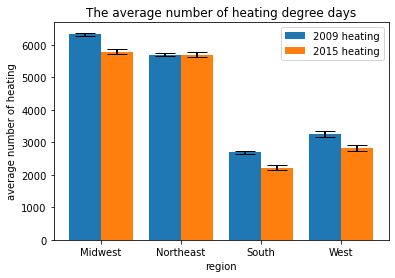

In [24]:
error_params = dict(elinewidth=2, ecolor='black', capsize=10)

plt.bar(range(4), df_09_mean.iloc[:,0], width=.4, 
        yerr=df_09_se.iloc[:,0], error_kw=error_params,
        label="2009 heating")
plt.bar([i + .4 for i in range(4)], df_15_mean.iloc[:,0], width=.4, 
        yerr=df_15_se.iloc[:,0], error_kw=error_params,
        label="2015 heating")
plt.xticks([i + .2 for i in range(4)], df_09_mean.index)

plt.xlabel("region")
plt.ylabel("average number of heating")
plt.title("The average number of heating degree days")
plt.legend()
plt.show()

Figure 1: The average number of heating degree days for residences in each Census region for both 2009 and 2015.

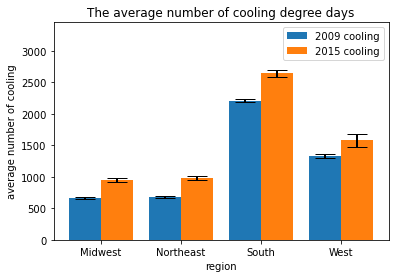

In [25]:
plt.bar(range(4), df_09_mean.iloc[:,1], width=.4, 
        yerr=df_09_se.iloc[:,1], error_kw=error_params,
        label="2009 cooling")
plt.bar([i + .4 for i in range(4)], df_15_mean.iloc[:,1], width=.4, 
        yerr=df_15_se.iloc[:,1], error_kw=error_params, 
        label="2015 cooling")
plt.xticks([i + .2 for i in range(4)], df_09_2a.index)

plt.xlabel("region")
plt.ylabel("average number of cooling")
plt.title("The average number of cooling degree days")
plt.ylim(0, 3450)
plt.legend()
plt.show()

Figure 1: The average number of cooling degree days for residences in each Census region for both 2009 and 2015.

### b)

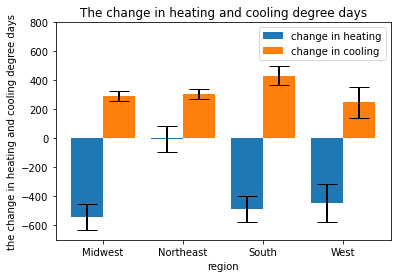

In [28]:
error_params = dict(elinewidth=2, ecolor='black', capsize=10)

plt.bar(range(4), df_mean_2b.iloc[:,0], width=.4, 
        yerr=df_se_2b.iloc[:,0], error_kw=error_params,
        label="change in heating")
plt.bar([i + .4 for i in range(4)], df_mean_2b.iloc[:,1], width=.4, 
        yerr=df_se_2b.iloc[:,1], error_kw=error_params,
        label="change in cooling")
plt.xticks([i + .2 for i in range(4)], df_09_mean.index)

plt.xlabel("region")
plt.ylabel("the change in heating and cooling degree days")
plt.title("The change in heating and cooling degree days")
plt.ylim(-700, 800)
plt.legend()
plt.show()

Figure 3: The change in heating and cooling degree days between 2009 and 2015 for each Census region.